#The Sparks Foundation

# Task 1-Predict the percentage of an student based on the no. of hours studied 

#  By:B.Suhas Nayak 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,adjusted_rand_score

In [3]:
#load the dataset
df=pd.read_csv("http://bit.ly/w-data")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#check the shape
df.shape

(25, 2)

In [7]:
#check for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#statastical description of given dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


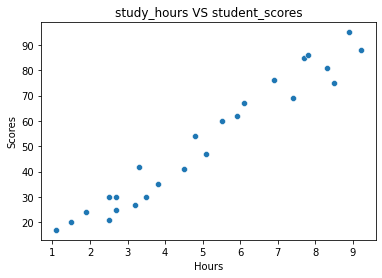

In [10]:
#plotting graph to understand the relationships 
se.scatterplot(data=df,x='Hours',y='Scores')
plt.title('study_hours VS student_scores')
plt.show()

from the above graph we clearly see a positve linear relation between the number of hours studeied and % of scores 

In [13]:
#data processing
x = df.drop(columns = ['Scores'])
y = df['Scores']

# Model Training

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print('Training completed')

Training completed


In [17]:
#checking the model performance on test data
y_pred=lr.predict(X_test)
show=pd.DataFrame({'Actual':Y_test,'predicted':y_pred})
show

,Actual,predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


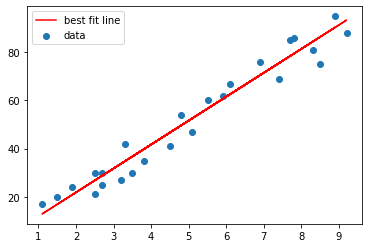

In [21]:
#plotting the regression line
line = lr.coef_*x+lr.intercept_
#plotting for the test data 
plt.scatter(x,y,label="data")
plt.plot(x,line,label='best fit line',color='r')
plt.legend()
plt.show()

In [24]:
#accuracy
lr.score(X_test,Y_test)


0.9367661043365056

# Evaluating the model

In [25]:
from sklearn import metrics 
print('Mean absolute Error:',metrics.mean_absolute_error(Y_test,y_pred))

Mean absolute Error: 4.130879918502482


# making prediction on realtime data 


In [28]:
Hours=float(input())
own_pred=lr.predict([[Hours]])
print("no of hours ={}".format(Hours))
print('Predicted scores={}'.format(own_pred[0]))

9.25
no of hours =9.25
Predicted scores=93.89272889341652
